# Friendships Within a Distributed Group Over Time

## Packages & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pagerank import powerIteration

## Loading Data

### 2017

In [2]:
# Importing Data
data_2017_know = pd.read_csv("data/2017_know.csv", index_col=0)
data_2017_like = pd.read_csv("data/2017_like.csv", index_col=0)
data_2017_contact = pd.read_csv("data/2017_contact.csv", index_col=0)
data_2017_trust = pd.read_csv("data/2017_trust.csv", index_col=0)
data_2017_support = pd.read_csv("data/2017_support.csv", index_col=0)

# General Data / Demographics
data_2017_demographics = pd.read_csv("data/2017_demographics.csv", index_col=0)
people = list(data_2017_demographics.sort_values(by=['lname']).index)
data_2017_demographics_men = data_2017_demographics[data_2017_demographics['gender']=='Male']
data_2017_demographics_women = data_2017_demographics[data_2017_demographics['gender']=='Female']

men = list(data_2017_demographics_men.index)
women = list(data_2017_demographics_women.index)

# Average: The Numbers
avg_2017_know = data_2017_know.mean()
avg_2017_like = data_2017_like.mean()
avg_2017_contact = data_2017_contact.mean()
avg_2017_trust = data_2017_trust.mean()
avg_2017_support = data_2017_support.mean()

avg_2017_know_descending = []
avg_2017_know_men_values = []
avg_2017_know_women_values = []
for person in avg_2017_know.sort_values(ascending=False).index:
    avg_2017_know_descending += [person]
    if person in men:
        avg_2017_know_men_values += [avg_2017_know[person]]
        avg_2017_know_women_values += [0.0]
    elif person in women:
        avg_2017_know_women_values += [avg_2017_know[person]]
        avg_2017_know_men_values += [0.0]
        
avg_2017_like_descending = []
avg_2017_like_men_values = []
avg_2017_like_women_values = []
for person in avg_2017_like.sort_values(ascending=False).index:
    avg_2017_like_descending += [person]
    if person in men:
        avg_2017_like_men_values += [avg_2017_like[person]]
        avg_2017_like_women_values += [0.0]
    elif person in women:
        avg_2017_like_women_values += [avg_2017_like[person]]
        avg_2017_like_men_values += [0.0]
        
avg_2017_contact_descending = []
avg_2017_contact_men_values = []
avg_2017_contact_women_values = []
for person in avg_2017_contact.sort_values(ascending=False).index:
    avg_2017_contact_descending += [person]
    if person in men:
        avg_2017_contact_men_values += [avg_2017_contact[person]]
        avg_2017_contact_women_values += [0.0]
    elif person in women:
        avg_2017_contact_women_values += [avg_2017_contact[person]]
        avg_2017_contact_men_values += [0.0]
        
avg_2017_trust_descending = []
avg_2017_trust_men_values = []
avg_2017_trust_women_values = []
for person in avg_2017_trust.sort_values(ascending=False).index:
    avg_2017_trust_descending += [person]
    if person in men:
        avg_2017_trust_men_values += [avg_2017_trust[person]]
        avg_2017_trust_women_values += [0.0]
    elif person in women:
        avg_2017_trust_women_values += [avg_2017_trust[person]]
        avg_2017_trust_men_values += [0.0]
        
avg_2017_support_descending = []
avg_2017_support_men_values = []
avg_2017_support_women_values = []
for person in avg_2017_support.sort_values(ascending=False).index:
    avg_2017_support_descending += [person]
    if person in men:
        avg_2017_support_men_values += [avg_2017_support[person]]
        avg_2017_support_women_values += [0.0]
    elif person in women:
        avg_2017_support_women_values += [avg_2017_support[person]]
        avg_2017_support_men_values += [0.0]
        
# Average: Correlation
avg_2017_all = pd.concat([avg_2017_know, avg_2017_contact, avg_2017_like, avg_2017_trust, avg_2017_support], axis=1, join='inner')
avg_2017_all.columns = ['know', 'contact', 'like', 'trust', 'support']
corr = avg_2017_all.corr()

# Correlation Among Raw Data
data_2017_know_corr = data_2017_know.corr()
data_2017_like_corr = data_2017_like.corr()
data_2017_contact_corr = data_2017_contact.corr()
data_2017_trust_corr = data_2017_trust.corr()
data_2017_support_corr = data_2017_support.corr()

### 2019

In [3]:
# Importing Data
data_2019_know = pd.read_csv("data/2019_know.csv", index_col=0)
data_2019_like = pd.read_csv("data/2019_like.csv", index_col=0)
data_2019_contact = pd.read_csv("data/2019_contact.csv", index_col=0)
data_2019_trust = pd.read_csv("data/2019_trust.csv", index_col=0)
data_2019_support = pd.read_csv("data/2019_support.csv", index_col=0)

# General Data / Demographics
data_2019_demographics = pd.read_csv("data/2019_demographics.csv", index_col=0)
people = list(data_2019_demographics.sort_values(by=['lname']).index)
data_2019_demographics_men = data_2019_demographics[data_2019_demographics['gender']=='Male']
data_2019_demographics_women = data_2019_demographics[data_2019_demographics['gender']=='Female']

# Average: The Numbers
avg_2019_know = data_2019_know.mean()
avg_2019_like = data_2019_like.mean()
avg_2019_contact = data_2019_contact.mean()
avg_2019_trust = data_2019_trust.mean()
avg_2019_support = data_2019_support.mean()

avg_2019_know_descending = []
avg_2019_know_men_values = []
avg_2019_know_women_values = []
for person in avg_2019_know.sort_values(ascending=False).index:
    avg_2019_know_descending += [person]
    if person in men:
        avg_2019_know_men_values += [avg_2019_know[person]]
        avg_2019_know_women_values += [0.0]
    elif person in women:
        avg_2019_know_women_values += [avg_2019_know[person]]
        avg_2019_know_men_values += [0.0]
        
avg_2019_like_descending = []
avg_2019_like_men_values = []
avg_2019_like_women_values = []
for person in avg_2019_like.sort_values(ascending=False).index:
    avg_2019_like_descending += [person]
    if person in men:
        avg_2019_like_men_values += [avg_2019_like[person]]
        avg_2019_like_women_values += [0.0]
    elif person in women:
        avg_2019_like_women_values += [avg_2019_like[person]]
        avg_2019_like_men_values += [0.0]
        
avg_2019_contact_descending = []
avg_2019_contact_men_values = []
avg_2019_contact_women_values = []
for person in avg_2019_contact.sort_values(ascending=False).index:
    avg_2019_contact_descending += [person]
    if person in men:
        avg_2019_contact_men_values += [avg_2019_contact[person]]
        avg_2019_contact_women_values += [0.0]
    elif person in women:
        avg_2019_contact_women_values += [avg_2019_contact[person]]
        avg_2019_contact_men_values += [0.0]
        
avg_2019_trust_descending = []
avg_2019_trust_men_values = []
avg_2019_trust_women_values = []
for person in avg_2019_trust.sort_values(ascending=False).index:
    avg_2019_trust_descending += [person]
    if person in men:
        avg_2019_trust_men_values += [avg_2019_trust[person]]
        avg_2019_trust_women_values += [0.0]
    elif person in women:
        avg_2019_trust_women_values += [avg_2019_trust[person]]
        avg_2019_trust_men_values += [0.0]
        
avg_2019_support_descending = []
avg_2019_support_men_values = []
avg_2019_support_women_values = []
for person in avg_2019_support.sort_values(ascending=False).index:
    avg_2019_support_descending += [person]
    if person in men:
        avg_2019_support_men_values += [avg_2019_support[person]]
        avg_2019_support_women_values += [0.0]
    elif person in women:
        avg_2019_support_women_values += [avg_2019_support[person]]
        avg_2019_support_men_values += [0.0]
        
# Average: Correlation
avg_2019_all = pd.concat([avg_2019_know, avg_2019_contact, avg_2019_like, avg_2019_trust, avg_2019_support], axis=1, join='inner')
avg_2019_all.columns = ['know', 'contact', 'like', 'trust', 'support']
corr = avg_2019_all.corr()

# Correlation Among Raw Data
data_2019_know_corr = data_2019_know.corr()
data_2019_like_corr = data_2019_like.corr()
data_2019_contact_corr = data_2019_contact.corr()
data_2019_trust_corr = data_2019_trust.corr()
data_2019_support_corr = data_2019_support.corr()

## Comparing Average Data

### How well do you know this person?

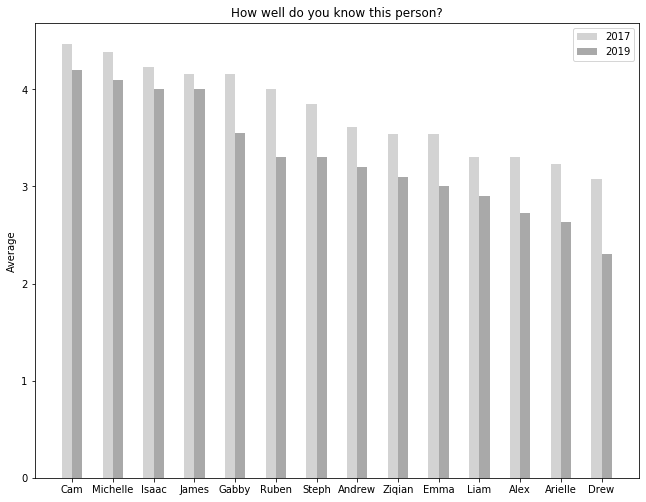

In [4]:
N = len(avg_2017_know_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_know_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_know_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_know_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_know_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How well do you know this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2017_know_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

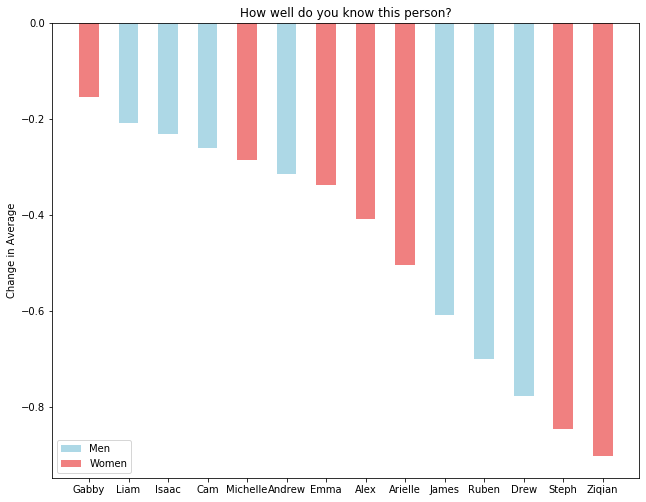

In [5]:
avg_diff_know_dict = {}
avg_diff_know_men_values = []
avg_diff_know_women_values = []
avg_diff_know_descending = []

for person in people:
    avg_diff_know_dict[person] = avg_2019_know[person]-avg_2017_know[person]

for person in {k: v for k, v in sorted(avg_diff_know_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_know_descending += [person]
    if person in men:
        avg_diff_know_men_values += [avg_diff_know_dict[person]]
        avg_diff_know_women_values += [0.0]
    elif person in women:
        avg_diff_know_women_values += [avg_diff_know_dict[person]]
        avg_diff_know_men_values += [0.0]  

N = len(avg_diff_know_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_know_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_know_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How well do you know this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_know_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you like this person?

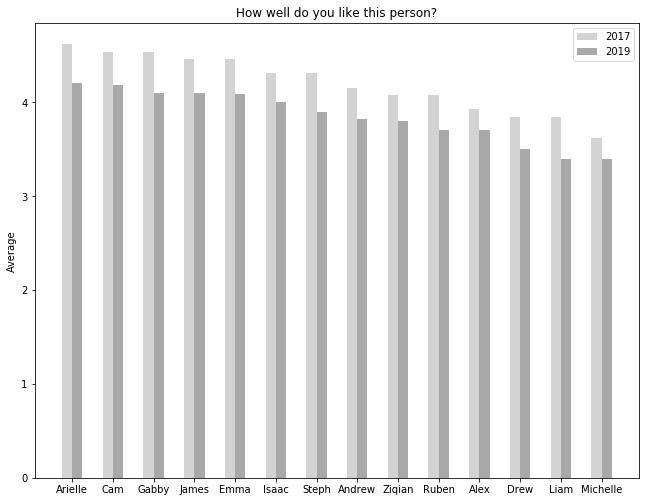

In [6]:
N = len(avg_2017_like_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_like_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_like_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_like_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_like_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How well do you like this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2017_like_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

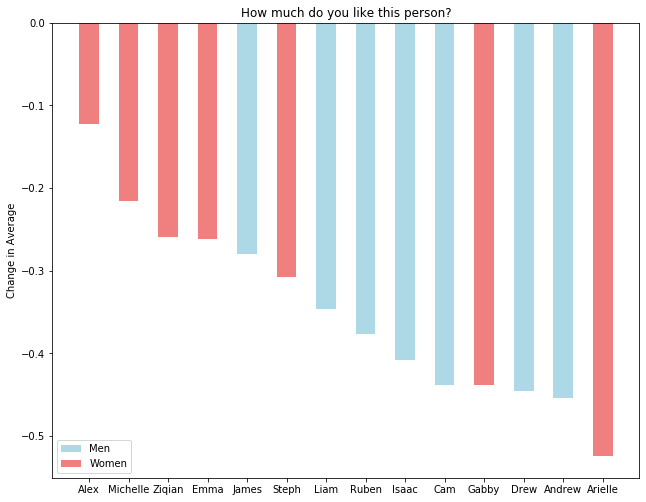

In [7]:
avg_diff_like_dict = {}
avg_diff_like_men_values = []
avg_diff_like_women_values = []
avg_diff_like_descending = []

for person in people:
    avg_diff_like_dict[person] = avg_2019_like[person]-avg_2017_like[person]

for person in {k: v for k, v in sorted(avg_diff_like_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_like_descending += [person]
    if person in men:
        avg_diff_like_men_values += [avg_diff_like_dict[person]]
        avg_diff_like_women_values += [0.0]
    elif person in women:
        avg_diff_like_women_values += [avg_diff_like_dict[person]]
        avg_diff_like_men_values += [0.0]  

N = len(avg_diff_like_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_like_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_like_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How much do you like this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_like_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How often do you communicate with this person?

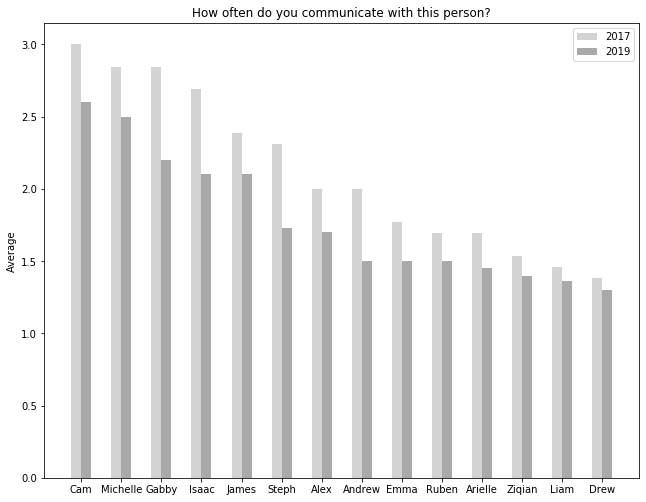

In [8]:
N = len(avg_2017_contact_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_contact_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_contact_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_contact_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_contact_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How often do you communicate with this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2017_contact_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

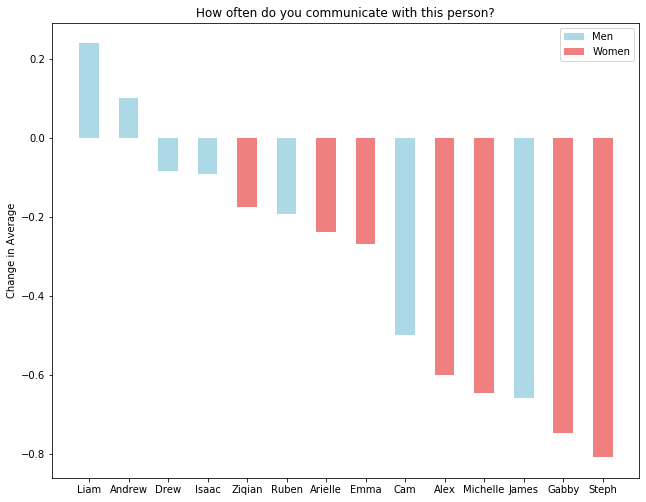

In [9]:
avg_diff_contact_dict = {}
avg_diff_contact_men_values = []
avg_diff_contact_women_values = []
avg_diff_contact_descending = []

for person in people:
    avg_diff_contact_dict[person] = avg_2019_contact[person]-avg_2017_contact[person]

for person in {k: v for k, v in sorted(avg_diff_contact_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_contact_descending += [person]
    if person in men:
        avg_diff_contact_men_values += [avg_diff_contact_dict[person]]
        avg_diff_contact_women_values += [0.0]
    elif person in women:
        avg_diff_contact_women_values += [avg_diff_contact_dict[person]]
        avg_diff_contact_men_values += [0.0]  

N = len(avg_diff_contact_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_contact_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_contact_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How often do you communicate with this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_contact_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you trust this person?

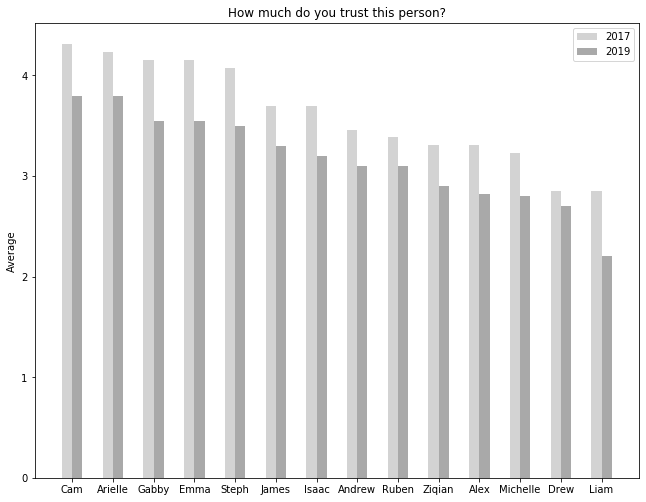

In [10]:
N = len(avg_2017_trust_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_trust_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_trust_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_trust_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_trust_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How much do you trust this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2017_trust_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

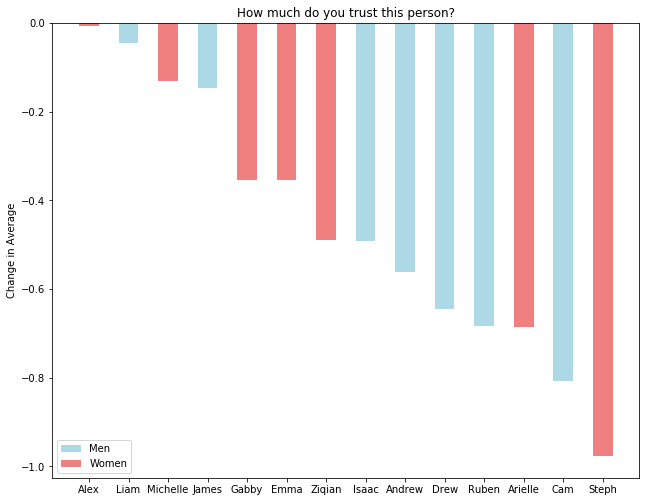

In [11]:
avg_diff_trust_dict = {}
avg_diff_trust_men_values = []
avg_diff_trust_women_values = []
avg_diff_trust_descending = []

for person in people:
    avg_diff_trust_dict[person] = avg_2019_trust[person]-avg_2017_trust[person]

for person in {k: v for k, v in sorted(avg_diff_trust_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_trust_descending += [person]
    if person in men:
        avg_diff_trust_men_values += [avg_diff_trust_dict[person]]
        avg_diff_trust_women_values += [0.0]
    elif person in women:
        avg_diff_trust_women_values += [avg_diff_trust_dict[person]]
        avg_diff_trust_men_values += [0.0]  

N = len(avg_diff_trust_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_trust_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_trust_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How much do you trust this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_trust_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How likely are you to go to this person for advice or emotional support?

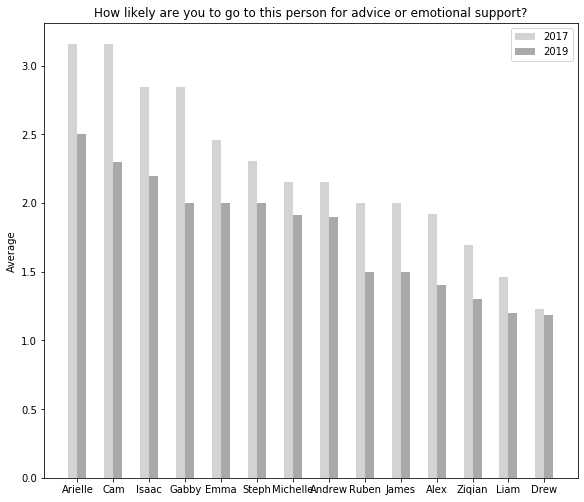

In [12]:
N = len(avg_2017_support_descending)
ind = np.arange(N)
width = 0.25
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, avg_2017_support_men_values, width, color="LightGray")
p2 = ax.bar(ind + width/2, avg_2019_support_men_values, width, color="DarkGray")
p3 = ax.bar(ind - width/2, avg_2017_support_women_values, width, color="LightGray")
p4 = ax.bar(ind + width/2, avg_2019_support_women_values, width, color="DarkGray")
ax.set_ylabel('Average')
ax.set_title('How likely are you to go to this person for advice or emotional support?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2017_support_descending)
ax.legend((p1[0], p2[0]), ('2017', '2019'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

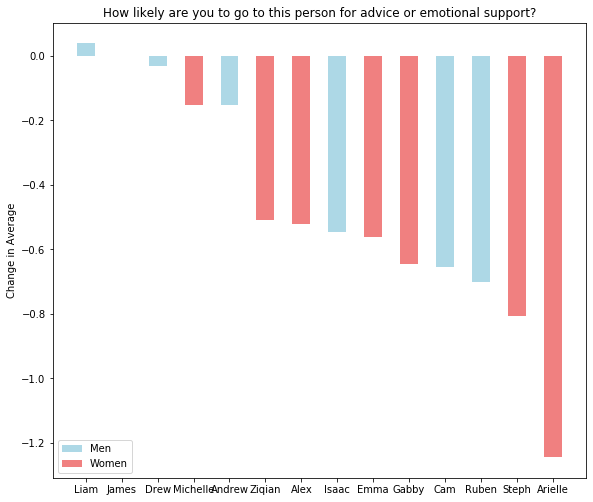

In [13]:
avg_diff_support_dict = {}
avg_diff_support_men_values = []
avg_diff_support_women_values = []
avg_diff_support_descending = []

for person in people:
    avg_diff_support_dict[person] = avg_2019_support[person]-avg_2017_support[person]

for person in {k: v for k, v in sorted(avg_diff_support_dict.items(), key=lambda item: item[1])[::-1]}:
    avg_diff_support_descending += [person]
    if person in men:
        avg_diff_support_men_values += [avg_diff_support_dict[person]]
        avg_diff_support_women_values += [0.0]
    elif person in women:
        avg_diff_support_women_values += [avg_diff_support_dict[person]]
        avg_diff_support_men_values += [0.0]  

N = len(avg_diff_support_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_diff_support_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_diff_support_women_values, width, color="LightCoral")
ax.set_ylabel('Change in Average')
ax.set_title('How likely are you to go to this person for advice or emotional support?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_diff_support_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

## Comparing Average Correlation

In [14]:
avg_2017_all

,know,contact,like,trust,support
Steph,3.846154,2.307692,4.307692,4.076923,2.307692
Emma,3.538462,1.769231,4.461538,4.153846,2.461538
Gabby,4.153846,2.846154,4.538462,4.153846,2.846154
Cam,4.461538,3.000000,4.538462,4.307692,3.153846
Andrew,3.615385,2.000000,4.153846,3.461538,2.153846
Isaac,4.230769,2.692308,4.307692,3.692308,2.846154
Alex,3.307692,2.000000,3.923077,3.307692,1.923077
Arielle,3.230769,1.692308,4.615385,4.230769,3.153846
Liam,3.307692,1.461538,3.846154,2.846154,1.461538
James,4.153846,2.384615,4.461538,3.692308,2.000000


In [15]:
avg_2019_all

,know,contact,like,trust,support
Steph,3.000000,1.500000,4.000000,3.100000,1.500000
Emma,3.200000,1.500000,4.200000,3.800000,1.900000
Gabby,4.000000,2.100000,4.100000,3.800000,2.200000
Cam,4.200000,2.500000,4.100000,3.500000,2.500000
Andrew,3.300000,2.100000,3.700000,2.900000,2.000000
Isaac,4.000000,2.600000,3.900000,3.200000,2.300000
Alex,2.900000,1.400000,3.800000,3.300000,1.400000
Arielle,2.727273,1.454545,4.090909,3.545455,1.909091
Liam,3.100000,1.700000,3.500000,2.800000,1.500000
James,3.545455,1.727273,4.181818,3.545455,2.000000


In [16]:
avg_diff_all = avg_2019_all.sub(avg_2017_all)
avg_diff_all

,know,contact,like,trust,support
Steph,-0.846154,-0.807692,-0.307692,-0.976923,-0.807692
Emma,-0.338462,-0.269231,-0.261538,-0.353846,-0.561538
Gabby,-0.153846,-0.746154,-0.438462,-0.353846,-0.646154
Cam,-0.261538,-0.500000,-0.438462,-0.807692,-0.653846
Andrew,-0.315385,0.100000,-0.453846,-0.561538,-0.153846
Isaac,-0.230769,-0.092308,-0.407692,-0.492308,-0.546154
Alex,-0.407692,-0.600000,-0.123077,-0.007692,-0.523077
Arielle,-0.503497,-0.237762,-0.524476,-0.685315,-1.244755
Liam,-0.207692,0.238462,-0.346154,-0.046154,0.038462
James,-0.608392,-0.657343,-0.279720,-0.146853,0.000000


In [17]:
corr = avg_diff_all.corr()
corr

,know,contact,like,trust,support
know,1.000000,0.079408,-0.129841,0.437531,0.113219
contact,0.079408,1.000000,-0.368351,0.017267,0.275567
like,-0.129841,-0.368351,1.000000,0.585777,0.267963
trust,0.437531,0.017267,0.585777,1.000000,0.544616
support,0.113219,0.275567,0.267963,0.544616,1.000000


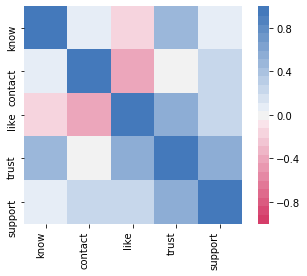

In [18]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [19]:
avg_2019_all.columns = ['2019_know', '2019_contact', '2019_like', '2019_trust', '2019_support']
avg_2017_all.columns = ['2017_know', '2017_contact', '2017_like', '2017_trust', '2017_support']
avg_all_all = pd.concat([avg_2019_all, avg_2017_all], axis=1, join='inner')
avg_all_all

,2019_know,2019_contact,2019_like,2019_trust,2019_support,2017_know,2017_contact,2017_like,2017_trust,2017_support
Steph,3.000000,1.500000,4.000000,3.100000,1.500000,3.846154,2.307692,4.307692,4.076923,2.307692
Emma,3.200000,1.500000,4.200000,3.800000,1.900000,3.538462,1.769231,4.461538,4.153846,2.461538
Gabby,4.000000,2.100000,4.100000,3.800000,2.200000,4.153846,2.846154,4.538462,4.153846,2.846154
Cam,4.200000,2.500000,4.100000,3.500000,2.500000,4.461538,3.000000,4.538462,4.307692,3.153846
Andrew,3.300000,2.100000,3.700000,2.900000,2.000000,3.615385,2.000000,4.153846,3.461538,2.153846
Isaac,4.000000,2.600000,3.900000,3.200000,2.300000,4.230769,2.692308,4.307692,3.692308,2.846154
Alex,2.900000,1.400000,3.800000,3.300000,1.400000,3.307692,2.000000,3.923077,3.307692,1.923077
Arielle,2.727273,1.454545,4.090909,3.545455,1.909091,3.230769,1.692308,4.615385,4.230769,3.153846
Liam,3.100000,1.700000,3.500000,2.800000,1.500000,3.307692,1.461538,3.846154,2.846154,1.461538
James,3.545455,1.727273,4.181818,3.545455,2.000000,4.153846,2.384615,4.461538,3.692308,2.000000


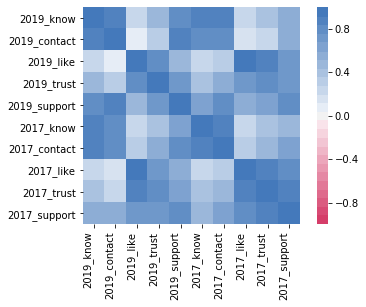

In [20]:
corr_all = avg_all_all.corr()
corr_all

ax = sns.heatmap(
    corr_all, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Correlation Among Raw Data

### How well do you know this person?

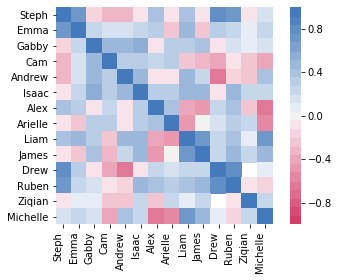

In [21]:
data_diff_know = data_2019_know.sub(data_2017_know)

data_diff_know_corr = data_diff_know.corr()

ax = sns.heatmap(
    data_diff_know_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you like this person?

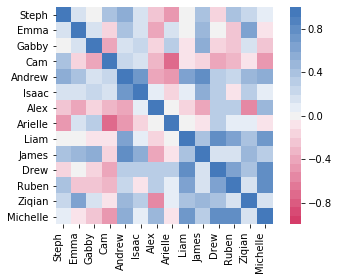

In [22]:
data_diff_like = data_2019_like.sub(data_2017_like)

data_diff_like_corr = data_diff_like.corr()

ax = sns.heatmap(
    data_diff_like_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

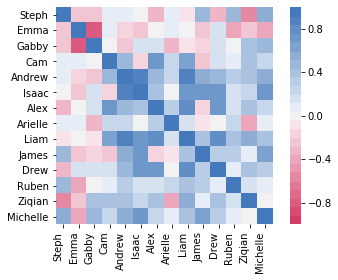

In [23]:
data_diff_contact = data_2019_contact.sub(data_2017_contact)

data_diff_contact_corr = data_diff_contact.corr()

ax = sns.heatmap(
    data_diff_contact_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you trust this person?

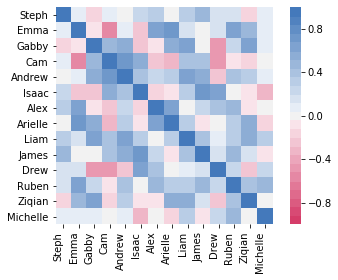

In [24]:
data_diff_trust = data_2019_trust.sub(data_2017_trust)

data_diff_trust_corr = data_diff_trust.corr()

ax = sns.heatmap(
    data_diff_trust_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How likely are you to go to this person for advice or emotional support?

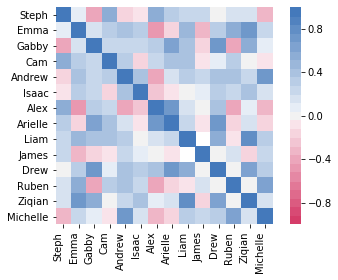

In [25]:
data_diff_support = data_2019_support.sub(data_2017_support)

data_diff_support_corr = data_diff_support.corr()

ax = sns.heatmap(
    data_diff_support_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## HeatMaps

### Raw Data

#### How well do you know this person?

##### 2017

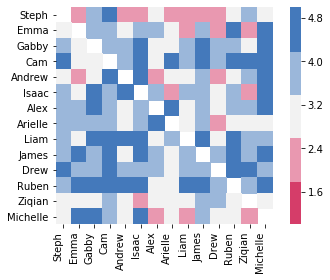

In [26]:
ax = sns.heatmap(
    data_2017_know, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

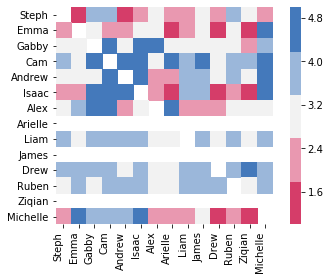

In [27]:
ax = sns.heatmap(
    data_2019_know, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### Difference

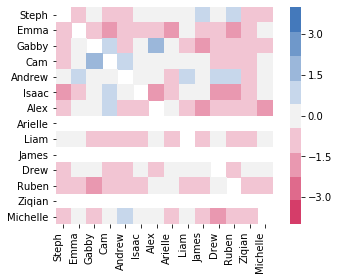

In [28]:
ax = sns.heatmap(
    data_diff_know, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### How much do you like this person?

##### 2017

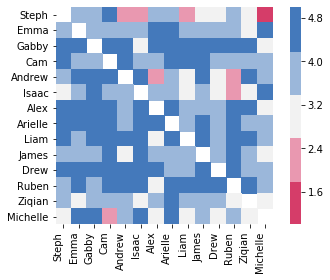

In [29]:
ax = sns.heatmap(
    data_2017_like, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

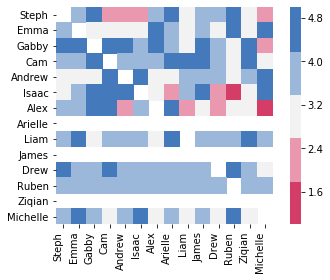

In [30]:
ax = sns.heatmap(
    data_2019_like, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### Difference

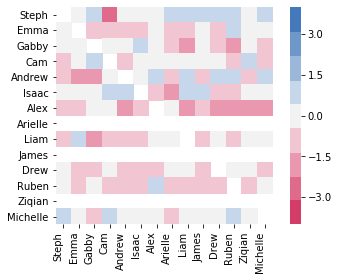

In [31]:
ax = sns.heatmap(
    data_diff_like, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

##### 2017

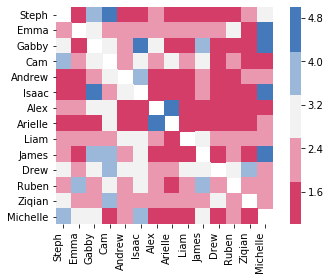

In [32]:
ax = sns.heatmap(
    data_2017_contact, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

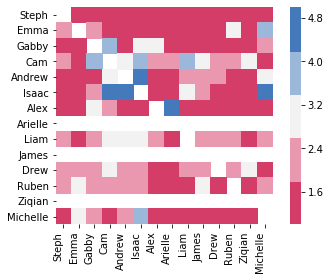

In [33]:
ax = sns.heatmap(
    data_2019_contact, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### Difference

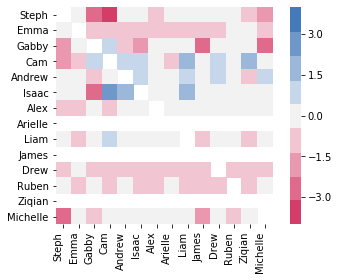

In [34]:
ax = sns.heatmap(
    data_diff_contact, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### How much do you trust this person?

##### 2017

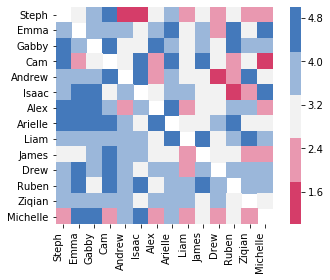

In [35]:
ax = sns.heatmap(
    data_2017_trust, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

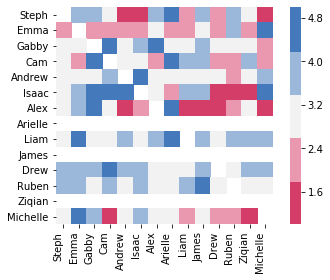

In [36]:
ax = sns.heatmap(
    data_2019_trust, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);


##### Difference

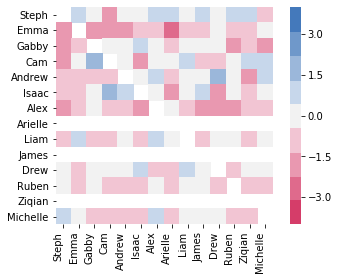

In [37]:
ax = sns.heatmap(
    data_diff_trust, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### How likely are you to go to this person for advice or emotional support?

##### 2017

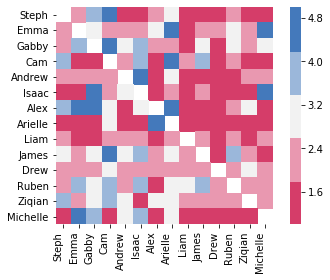

In [38]:
ax = sns.heatmap(
    data_2017_support, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### 2019

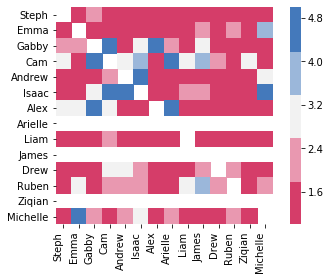

In [39]:
ax = sns.heatmap(
    data_2019_support, 
    vmin=1, vmax=5, center=3,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

##### Difference

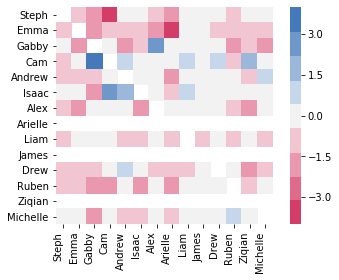

In [40]:
ax = sns.heatmap(
    data_diff_support, 
    vmin=-4, vmax=4, center=0,
    cmap=sns.diverging_palette(0, 250, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);